In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [23]:
data = "housing.csv"
df = pd.read_csv(data)

In [24]:
print(df.shape)
print(df.info())
display(df.head())

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
df = df.dropna().reset_index(drop=True)
print(df.shape)

(20433, 10)


In [26]:
X = df.drop(columns='median_house_value')
y = df['median_house_value']
print(X.shape)
display(X.head())
print(y.shape)
display(y.head())

(20433, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


(20433,)


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [27]:
print(X['ocean_proximity'].value_counts())
X_dummy = pd.get_dummies(X, drop_first=True, dtype='uint8')
print(f"ダミー変数化後の説明変数の形状: {X_dummy.shape}")
display(X_dummy.head())

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64
ダミー変数化後の説明変数の形状: (20433, 12)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [28]:
X_dummy_c = sm.add_constant(X_dummy)
model = sm.OLS(y, X_dummy_c)
results = model.fit()
print(results.summary())
print(results.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:58:48   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [29]:
housing_median_age_coef = results.params['housing_median_age']
print(housing_median_age_coef)

1072.5200416380437


In [30]:
X_scaled_array = scale(X_dummy)
y_scaled_array = scale(y)

X_scaled = pd.DataFrame(X_scaled_array, columns=X_dummy.columns)
y_scaled = pd.Series(y_scaled_array, name=y.name)

model_scaled = sm.OLS(y_scaled, X_scaled)
results_scaled = model_scaled.fit()
print(results_scaled.summary())

                                 OLS Regression Results                                
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              3112.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):                        0.00
Time:                        17:58:48   Log-Likelihood:                         -18370.
No. Observations:               20433   AIC:                                  3.676e+04
Df Residuals:                   20421   BIC:                                  3.686e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [31]:
coef_abs = results_scaled.params.abs().sort_values(ascending=False)
print(coef_abs)
print(coef_abs.index[0])

median_income                 0.645947
latitude                      0.471594
longitude                     0.465384
population                    0.372735
total_bedrooms                0.367070
households                    0.164322
ocean_proximity_INLAND        0.158477
total_rooms                   0.117242
housing_median_age            0.116991
ocean_proximity_ISLAND        0.020718
ocean_proximity_NEAR OCEAN    0.012407
ocean_proximity_NEAR BAY      0.010764
dtype: float64
median_income


In [32]:
data2 = pd.DataFrame({
    'longitude': [-122.0],
    'latitude': [38.0],
    'housing_median_age': [5],
    'total_rooms': [10000],
    'total_bedrooms': [1500],
    'population': [3000],
    'households': [1700],
    'median_income': [5.0],
    'ocean_proximity': ['NEAR BAY']
})

data2_dummy = pd.get_dummies(data2, drop_first=True, dtype='uint8')
for col in X_dummy.columns:
    if col not in data2_dummy.columns:
        data2_dummy[col] = 0

data2_dummy = data2_dummy[X_dummy.columns]

data2_dummy_c = sm.add_constant(data2_dummy, has_constant='add')
prediction = results.predict(data2_dummy_c)
print(prediction[0])

293912.02111170255


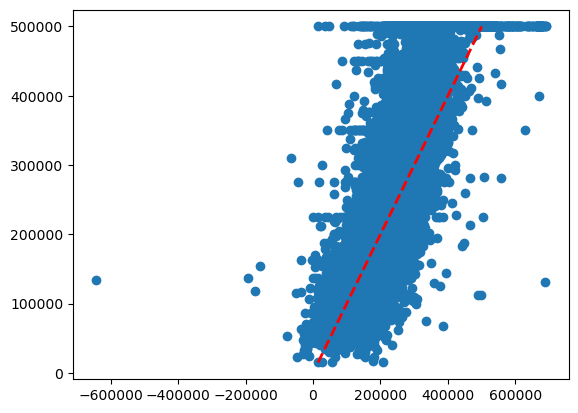

In [33]:
X_dummy_c = sm.add_constant(X_dummy)
y_pred = results.predict(X_dummy_c)

plt.scatter(y_pred, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)

In [34]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

4710777903.4076
68635.10693083824
